<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Kaggle%2C%20%EB%8D%B0%EC%9D%B4%EC%BD%98/boston_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[Kaggle] 보스턴 주택 가격 예측(House Prices: Advanced Regression Techniques)](https://velog.io/@jaehyeong/Kaggle-%EB%B3%B4%EC%8A%A4%ED%84%B4-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1House-Prices-Advanced-Regression-Techniques)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)
len_train = len(train)
len_test = len(test)

## 2. Feature Selection - Variables of Corrleation >= 0.3
- corr()함수를 통해 dataframe내의 모든 변수간의 상관관계를 그린 후 상관관계가 0.3이상인 변수만 heatmap으로 출력하였다.

In [4]:
corr = train.corr()
top_corr = corr.index[abs(corr['SalePrice'])>=0.3]
top_corr

<ipython-input-4-3f94e5d36f8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', 'FlrSF_1st', 'FlrSF_2nd', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<Axes: >

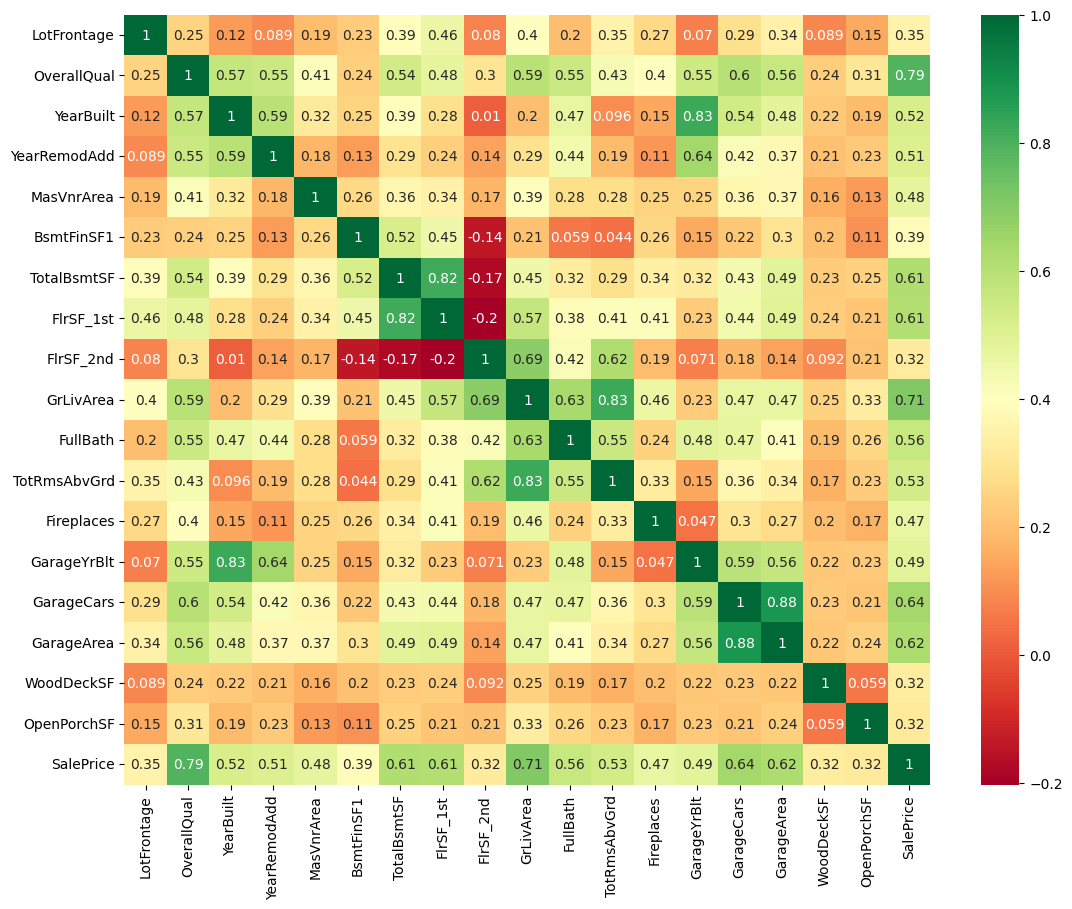

In [5]:
plt.figure(figsize=(13, 10))
sns.heatmap(train[top_corr].corr(), annot=True, cmap='RdYlGn')

In [6]:
train_y = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

## 3. Concat train & test set
- train과 test 셋에 동일한 feature engineering을 적용해주기 위해 우선 두개의 데이터 셋을 하나로 합쳐주었다.

In [7]:
boston = pd.concat((train, test), axis=0)
boston

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## 4. Check NaN ratio and Remove null ratio >= 0.5
- 우선 각 칼럼별로 Null값 비율이 50%이상인 칼럼을 찾아 해당 칼럼을 제거해주었다.

In [8]:
check_null = boston.isna().sum() / len(boston)
check_null[check_null >= 0.5]

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [9]:
remove_cols = check_null[check_null >= 0.5].keys()
boston = boston.drop(remove_cols, axis=1)
boston.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,Porch_3Ssn,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


## 5. Check Object & Numeric variables
- 수치형 데이터와 카테고리형 데이터를 구분하기 위해 select_dtypes()를 이용하였다. parameter값으로 include와 exclude를 적용할 수 있는데 이를 통해 데이터를 분리한다.

In [10]:
boston_obj = boston.select_dtypes(include='object') # 범주형
boston_num = boston.select_dtypes(exclude='object') # 수치형

In [11]:
boston_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FlrSF_1st', 'FlrSF_2nd', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Porch_3Ssn', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [12]:
boston_obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## 6. Change object type to dummy variables
- 위에서 분리한 카테고리형 데이터에 one-hot encoding을 적용하기 위해 pandas의 pd.get_dummies()를 적용하였다.
- one-hot encoding 적용시 [남자, 여자]의 경우 [[1,0], [0,1]]과 같은 형태로 변환된다.

In [13]:
boston_dummy = pd.get_dummies(boston_obj, drop_first=True)
boston_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## 7. Impute NaN of numeric data to 'mean'
- 평균값 대체를 위하여 scikit-learn의 Imputer 함수를 이용하였으며, strategy 값에 대체해주고자 하는 이름을 넣어주면 해당 값으로 처리한다.

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num)
boston_num_ = imputer.transform(boston_num)

In [15]:
boston_num_

array([[6.0000e+01, 6.5000e+01, 8.4500e+03, ..., 0.0000e+00, 2.0000e+00,
        2.0080e+03],
       [2.0000e+01, 8.0000e+01, 9.6000e+03, ..., 0.0000e+00, 5.0000e+00,
        2.0070e+03],
       [6.0000e+01, 6.8000e+01, 1.1250e+04, ..., 0.0000e+00, 9.0000e+00,
        2.0080e+03],
       ...,
       [2.0000e+01, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 9.0000e+00,
        2.0060e+03],
       [8.5000e+01, 6.2000e+01, 1.0441e+04, ..., 7.0000e+02, 7.0000e+00,
        2.0060e+03],
       [6.0000e+01, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 1.1000e+01,
        2.0060e+03]])

In [16]:
boston_num = pd.DataFrame(boston_num_, columns=boston_num.columns, index=boston.index)
boston_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Porch_3Ssn,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


## 8. Merge numeric_df & dummies_df
- 위에서 각각 처리한 카테고리형 데이터와 수치형 데이터를 이제 최종적으로 다시 하나로 merge해준다.
- merge시 index 순서가 꼬이지 않게 left_index=True, right_index=True를 지정하여 merge를 수행한다.

In [17]:
boston = pd.merge(boston_dummy, boston_num, left_index=True, right_index=True)
boston.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Porch_3Ssn,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


## 9. Split train & validation & test set
- 모델 학습 및 검증을 위해 데이터를 split한다.
- 여기서 test set의 경우 정답값이 없는 예측해야 하는 값이므로 검증을 위해 validation set을 train set의 20%만큼을 지정해주었다.

In [18]:
train = boston[:len_train]
test = boston[len_train:]

train['SalePrice'] = train_y

<ipython-input-18-d043fdc295d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'] = train_y


In [19]:
from sklearn.model_selection import train_test_split

X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True)

X_test = test

## 10. Training by XGBRegression Model
- 최적의 모델 파라미터 설정을 위하여 GridSearch를 이용하였으며, 5번의 cross-validation으로 검증을 진행하였다.

In [22]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 600}
XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


## 11. Prediction & Score
- 검증을 위해 Mean Absolute Error(MAE) 지표를 활용하였다. MSE를 활용할 경우 error값이 클 경우 그에 제곱된 값이 출력되기 때문에 값이 너무 커져 보기 불편하다는 단점이 있다.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_val)

print(mean_squared_error(y_train, pred_train))
print(mean_absolute_error(y_val, pred_val))

27057241.66416223
15061.36594338613


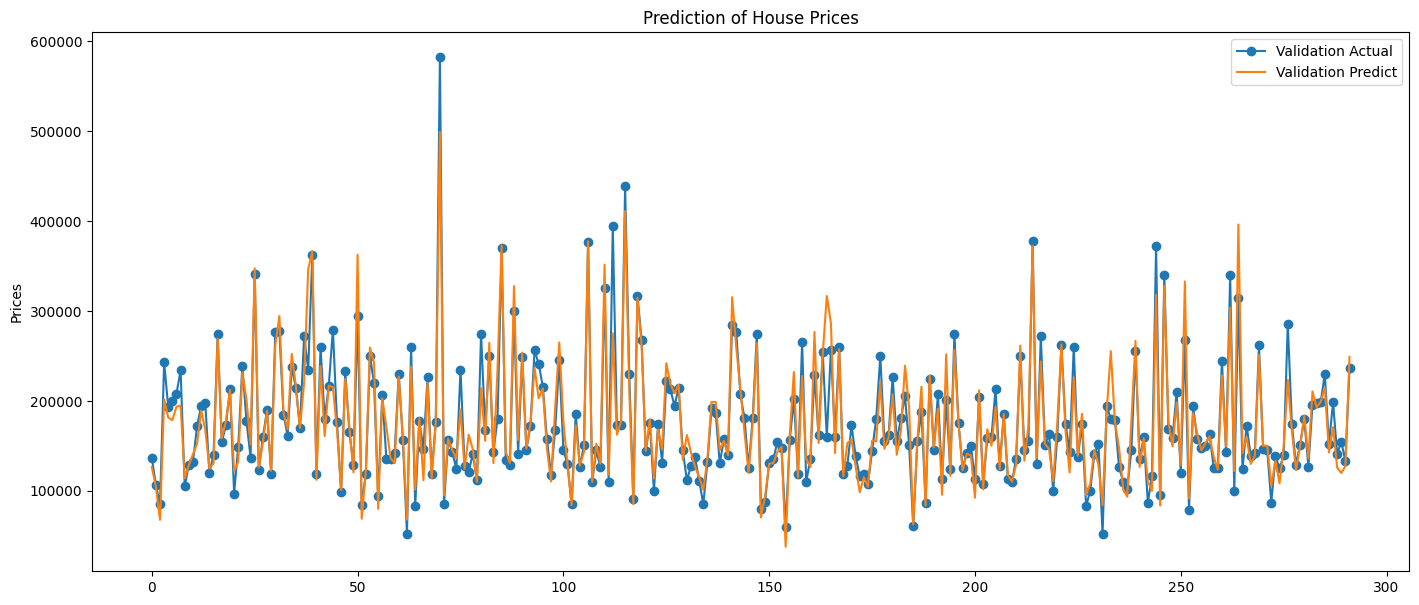

In [29]:
plt.figure(figsize=(17, 7))
plt.plot(range(0, len(y_val)), y_val, 'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '-', label='Validation Predict')
plt.title('Prediction of House Prices')
plt.ylabel('Prices')
plt.legend()

In [30]:
test_y_pred = grid_search.predict(X_test)

id_pred = pd.DataFrame()
id_pred['Id'] = test.index
id_pred['SalePrice'] = test_y_pred

id_pred.to_csv('submission.csv', index=False)

In [31]:
id_pred

,Id,SalePrice
0,1461,132236.437500
1,1462,169608.828125
2,1463,188177.421875
3,1464,201368.515625
4,1465,196062.593750
...,...,...
1454,2915,80609.007812
1455,2916,89027.757812
1456,2917,170286.234375
1457,2918,111034.664062
